In [458]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [361]:
data = pd.read_csv("glassproject.csv")

In [362]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [363]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [364]:
data.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


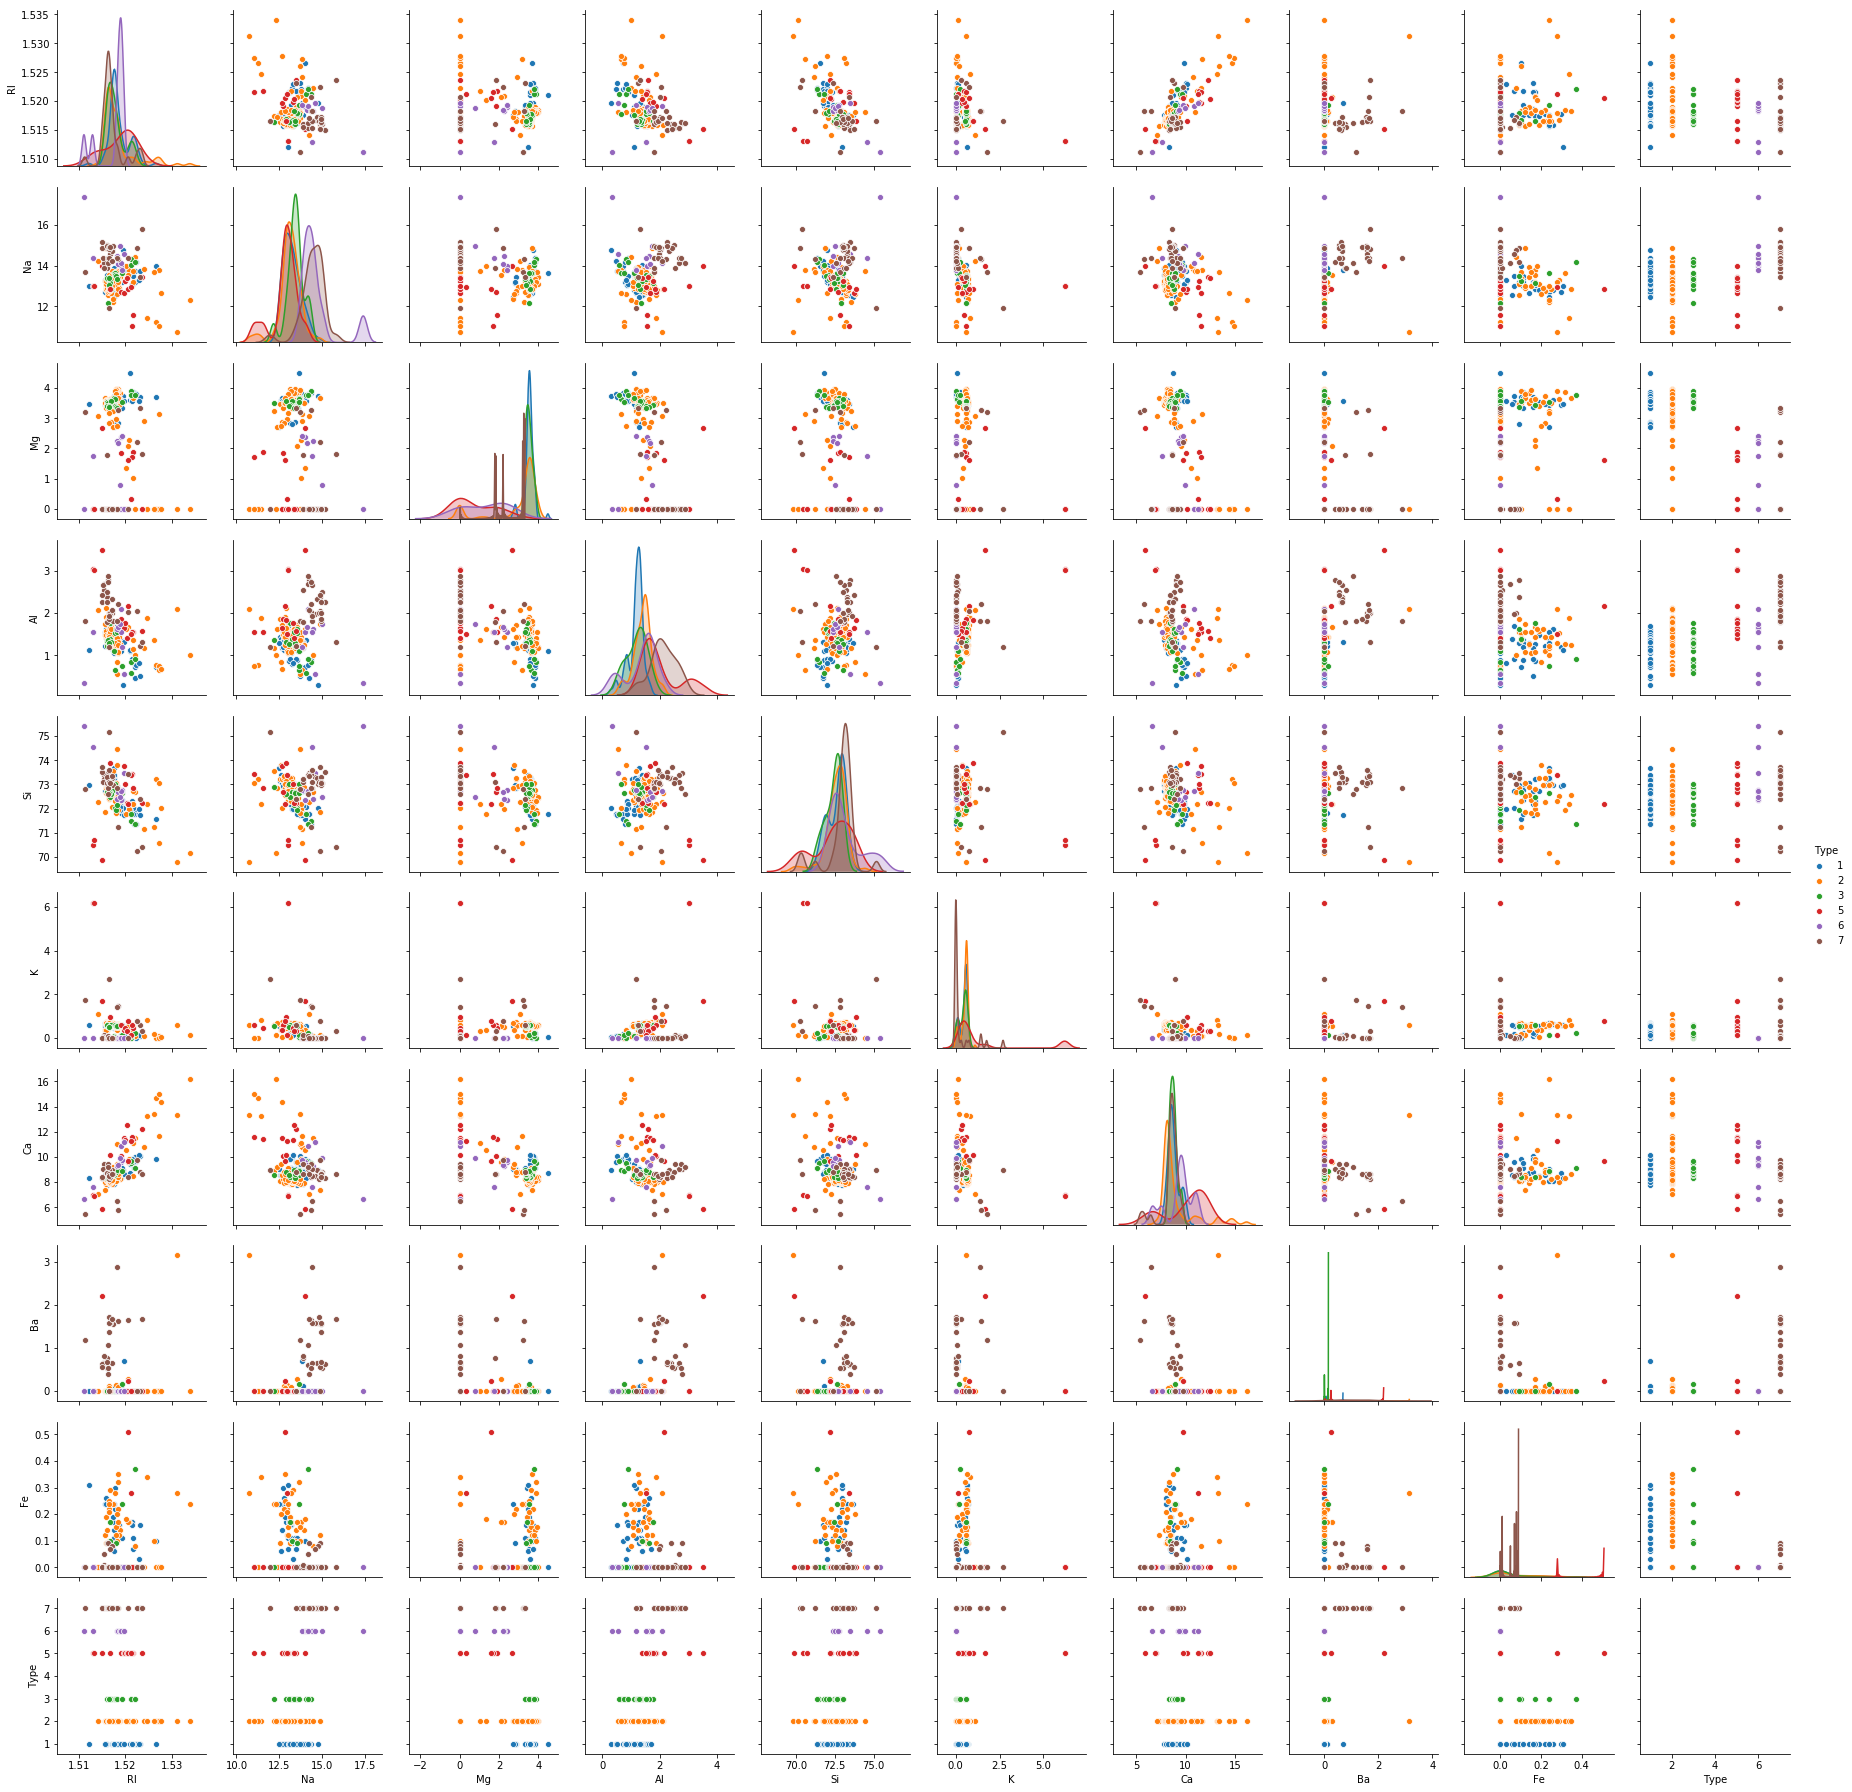

In [365]:
sns.pairplot(data,diag_kind="kde",hue="Type")
plt.show()

In [366]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [367]:

data.Type=data.Type.astype('category')

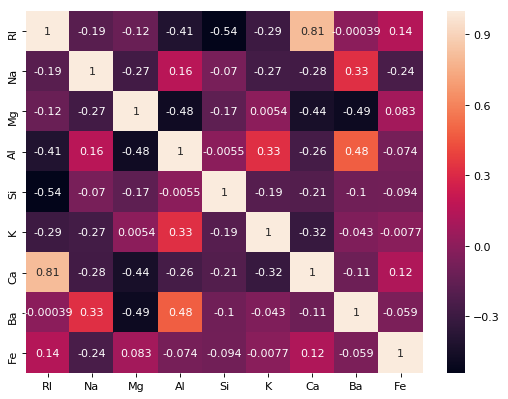

In [368]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

sns.heatmap(data.corr(),annot=True)


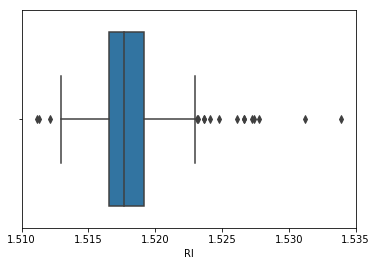

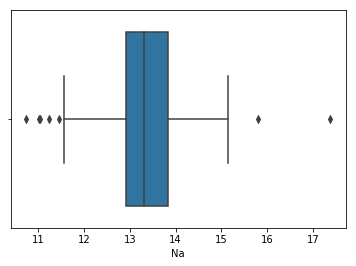

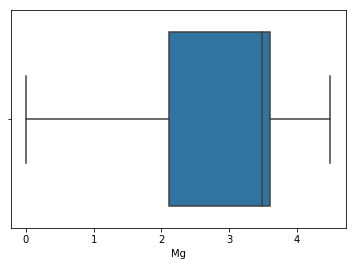

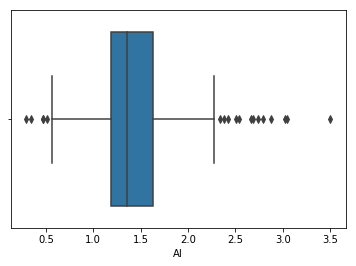

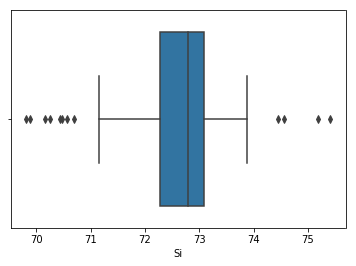

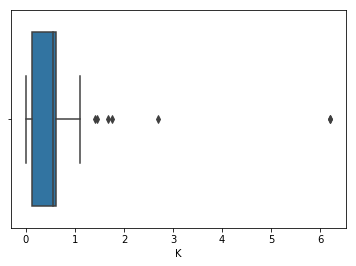

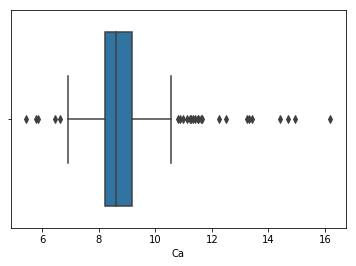

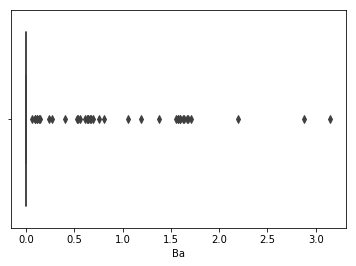

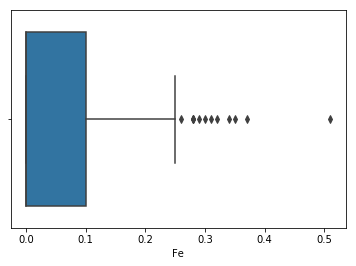

In [369]:

features = data.columns[:-1].tolist()

for i in features:
    sns.boxplot(data[i])
    plt.show()

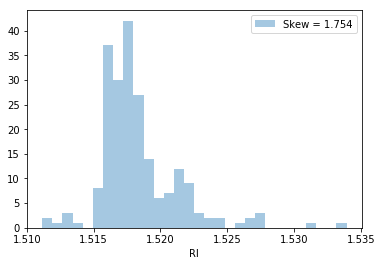

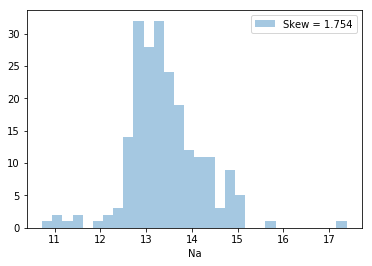

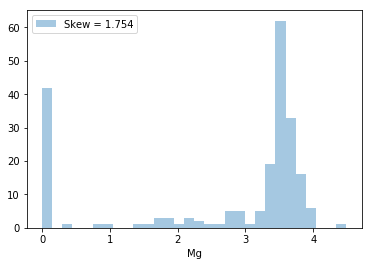

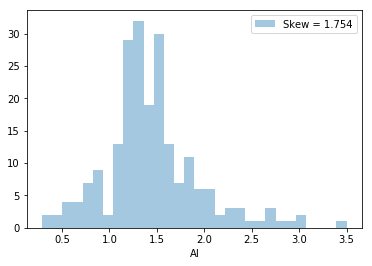

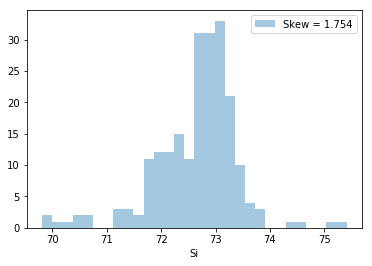

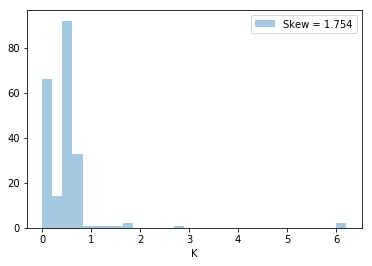

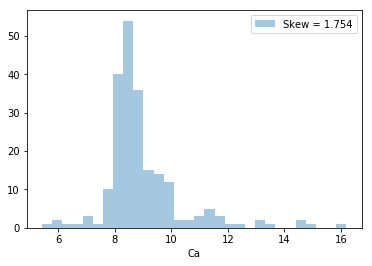

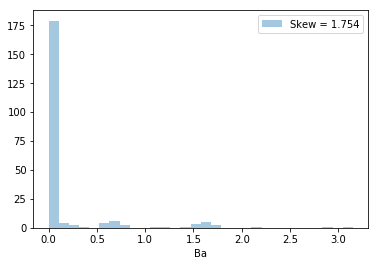

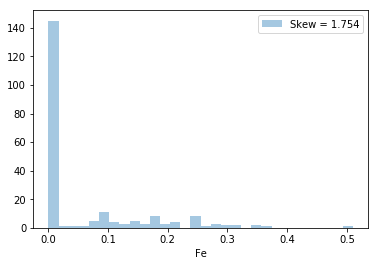

In [370]:
for i in features:
    skew = data[feat].skew()
    sns.distplot(data[i], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

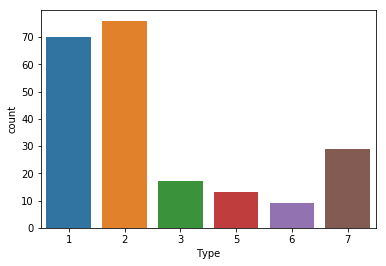

In [371]:
sns.countplot(data['Type'])
plt.show()

In [372]:
data.shape

(214, 10)

In [373]:
from scipy import stats
z = np.abs(stats.zscore(data.drop(columns="Type")))

data = data[(z < 3).all(axis=1)]
print(data)


          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe Type
0    1.52101  13.64  4.49  1.10  71.78  0.06   8.75  0.00  0.00    1
1    1.51761  13.89  3.60  1.36  72.73  0.48   7.83  0.00  0.00    1
2    1.51618  13.53  3.55  1.54  72.99  0.39   7.78  0.00  0.00    1
3    1.51766  13.21  3.69  1.29  72.61  0.57   8.22  0.00  0.00    1
4    1.51742  13.27  3.62  1.24  73.08  0.55   8.07  0.00  0.00    1
5    1.51596  12.79  3.61  1.62  72.97  0.64   8.07  0.00  0.26    1
6    1.51743  13.30  3.60  1.14  73.09  0.58   8.17  0.00  0.00    1
7    1.51756  13.15  3.61  1.05  73.24  0.57   8.24  0.00  0.00    1
8    1.51918  14.04  3.58  1.37  72.08  0.56   8.30  0.00  0.00    1
9    1.51755  13.00  3.60  1.36  72.99  0.57   8.40  0.00  0.11    1
10   1.51571  12.72  3.46  1.56  73.20  0.67   8.09  0.00  0.24    1
11   1.51763  12.80  3.66  1.27  73.01  0.60   8.56  0.00  0.00    1
12   1.51589  12.88  3.43  1.40  73.28  0.69   8.05  0.00  0.24    1
13   1.51748  12.86  3.56  1.27  7

In [374]:
from sklearn.preprocessing import StandardScaler

In [394]:
x = data.drop(columns='Type',axis=1)
y = data.iloc[:,9]

In [376]:


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [377]:
from sklearn.linear_model import LogisticRegression

In [378]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [379]:
lg.score(x_train,y_train)

0.7111111111111111

In [380]:
lg.score(x_test, y_test)

0.6779661016949152

In [381]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, random_state=42)
gbcl = gbcl.fit(x_train,y_train)


In [382]:
gbcl.score(x_train,y_train)

1.0

In [383]:
gbcl.score(x_test, y_test)

0.7457627118644068

In [384]:
from sklearn.tree import DecisionTreeClassifier
rfcl = DecisionTreeClassifier(random_state=42)
rfcl = rfcl.fit(x_train,y_train)
rfcl.score(x_train,y_train)

1.0

In [385]:
rfcl.score(x_test, y_test)

0.6101694915254238

In [386]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=42)
rfcl = rfcl.fit(x_train,y_train)
rfcl.score(x_train,y_train)

1.0

In [387]:
rfcl.score(x_test, y_test)

0.7627118644067796

In [446]:
from imblearn.over_sampling import SMOTE

In [452]:
sm=SMOTE(k_neighbors=5,random_state=1)
x_os,y_os=sm.fit_sample(x,y)
x=pd.DataFrame(x_os,columns=x.columns)
y=pd.DataFrame(y_os,columns=['Type'])
x_sample,x_test,y_sample,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
x_train,x_val,y_train,y_val = train_test_split(x_sample,y_sample,test_size=0.3,random_state=1)

In [453]:

lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_val,y_val)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6741573033707865

In [454]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_val,y_val)

0.797752808988764

In [455]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_val,y_val)


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8651685393258427

In [456]:
print('Logistic Regression:')
print('Train',lr.score(x_train,y_train))
print('Valid',lr.score(x_val,y_val))
print('Test',lr.score(x_test,y_test))
print('\n\n')

print('Decision Tree:')
print('Train',dt.score(x_train,y_train))
print('Valid',dt.score(x_val,y_val))
print('Test',dt.score(x_test,y_test))
print('\n\n')

print('Random Forest:')
print('Train',rf.score(x_train,y_train))
print('Valid',rf.score(x_val,y_val))
print('Test',rf.score(x_test,y_test))
print('\n\n')

Logistic Regression:
Train 0.7317073170731707
Valid 0.6741573033707865
Test 0.746031746031746



Decision Tree:
Train 1.0
Valid 0.797752808988764
Test 0.8253968253968254



Random Forest:
Train 0.9902439024390244
Valid 0.8651685393258427
Test 0.9047619047619048





In [460]:

bc = BaggingClassifier(oob_score=True,random_state=1)
bc.fit(x,y)
bc.oob_score_


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


0.8666666666666667

In [461]:

rf = RandomForestClassifier(oob_score=True,random_state=1)
rf.fit(x,y)
rf.oob_score_

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.8523809523809524

In [462]:
gb = GradientBoostingClassifier(max_depth=5)
gb.fit(x_train,y_train)
gb.score(x_val,y_val)


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9213483146067416

In [463]:
gb.score(x_test,y_test)


0.9126984126984127

In [464]:
print('Logistic Regression:')
print('Train',lr.score(x_train,y_train))
print('Valid',lr.score(x_val,y_val))
print('Test',lr.score(x_test,y_test))
print('\n\n')

print('Decision Tree:')
print('Train',dt.score(x_train,y_train))
print('Valid',dt.score(x_val,y_val))
print('Test',dt.score(x_test,y_test))
print('\n\n')

print('Random Forest:')
print('Train',rf.score(x_train,y_train))
print('Valid',rf.score(x_val,y_val))
print('Test',rf.score(x_test,y_test))
print('\n\n')

print('Gradient Descent:')
print('Train',gb.score(x_train,y_train))
print('Valid',gb.score(x_val,y_val))
print('Test',gb.score(x_test,y_test))
print('\n\n')


Logistic Regression:
Train 0.7317073170731707
Valid 0.6741573033707865
Test 0.746031746031746



Decision Tree:
Train 1.0
Valid 0.797752808988764
Test 0.8253968253968254



Random Forest:
Train 0.9951219512195122
Valid 0.9887640449438202
Test 0.9920634920634921



Gradient Descent:
Train 1.0
Valid 0.9213483146067416
Test 0.9126984126984127





In [388]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
brf = BalancedRandomForestClassifier(n_estimators=50, random_state=42)
brf.fit(x_train, y_train) 
y_trainpred=brf.predict(x_train)
y_pred = brf.predict(x_test)
print(balanced_accuracy_score(y_train,y_trainpred)  )
print(balanced_accuracy_score(y_test, y_pred)  )

brf.feature_importances_  

0.8121944054274882
0.7318840579710145


array([0.11965136, 0.1201147 , 0.17340832, 0.13255054, 0.08538934,
       0.10832394, 0.15842479, 0.08226016, 0.01987685])

In [389]:
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=0, sampling_strategy = 'auto')
eec.fit(x_train, y_train) 

y_pred = eec.predict(x_test )
balanced_accuracy_score(y_test, y_pred)  

0.6474810213940648

In [390]:
from imblearn.ensemble import BalancedBaggingClassifier
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),sampling_strategy='auto',replacement=False,random_state=0)
bbc.fit(x_train, y_train) 

y_pred = bbc.predict(x_test)
balanced_accuracy_score(y_test, y_pred)  

0.594375431331953

In [441]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

clf = BalancedRandomForestClassifier(n_estimators=50)

param_dist = {"max_depth": range(1,20),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              'n_estimators': range(1,100),
              'random_state':range(1,100),
              "criterion": ["gini", "entropy"]}

samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples) 

randomCV.fit(x_train, y_train)

print(randomCV.best_params_)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 38, 'random_state': 70}


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [444]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
brf = BalancedRandomForestClassifier(bootstrap=False,n_estimators=38, random_state=70,criterion='entropy', max_depth=2, min_samples_leaf= 1, min_samples_split = 7)
brf.fit(x_train, y_train) 
y_trainpred=brf.predict(x_train)
y_pred = brf.predict(x_test)
print(balanced_accuracy_score(y_train,y_trainpred)  )
print(balanced_accuracy_score(y_test, y_pred)  )

brf.feature_importances_  

0.809056524094118
0.7030365769496204


array([0.14724753, 0.2354203 , 0.2701896 , 0.06403049, 0.03621222,
       0.10955851, 0.10324497, 0.03409637, 0.        ])

In [471]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [488]:
data=pd.concat([pd.DataFrame(x),pd.DataFrame(y)],axis=1)

In [490]:

data=np.asarray(data,dtype='float64')

from sklearn.utils import resample
import numpy as np

values = data
n_iterations = 100              
n_size = int(len(values) *  1)   
stats = list()

for i in range(n_iterations):

    train = resample(values, n_samples=n_size) 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    model = GradientBoostingClassifier(max_depth=5)
    model.fit(train[:,:-1], train[:,-1])
    score = model.score(test[:,:-1], test[:,-1])  
    print(score)
    stats.append(score)


0.9
0.8930817610062893
0.891156462585034
0.879746835443038
0.8766233766233766
0.8947368421052632
0.8881578947368421
0.9102564102564102
0.8666666666666667
0.9130434782608695
0.8811188811188811
0.8853503184713376
0.8782051282051282
0.844311377245509
0.8918918918918919
0.8289473684210527
0.901840490797546
0.9006622516556292
0.8757396449704142
0.8258064516129032
0.8431372549019608
0.9319727891156463
0.85
0.8441558441558441
0.922077922077922
0.9047619047619048
0.8838709677419355
0.8881578947368421
0.9036144578313253
0.7960526315789473
0.8758169934640523
0.9271523178807947
0.9019607843137255
0.8587570621468926
0.8562091503267973
0.8571428571428571
0.8580645161290322
0.9310344827586207
0.8486842105263158
0.8940397350993378
0.910958904109589
0.8641975308641975
0.8853503184713376
0.863013698630137
0.8671328671328671
0.8410596026490066
0.864516129032258
0.8888888888888888
0.8961038961038961
0.8741721854304636
0.8897058823529411
0.912751677852349
0.9130434782608695
0.8867924528301887
0.8571428571

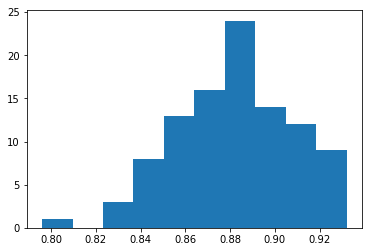

95.0 confidence interval 83.1% and 92.8%


In [492]:
from matplotlib import pyplot

# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [474]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [478]:
data.Type.value_counts()

1    70
2    68
7    23
3    16
5     9
6     8
Name: Type, dtype: int64